# Task 3 : Natural Language Processing

## Objectives :
    - Preprocess text data (Tokenization, Removing stopwords, and Stemming/Lemmatization).
    - Use nltk or TextBlob for sentiment analysis.
    - Visualize the sentiment distribution and word frequencies using word clouds.

### 1. Importing Libraries

In [13]:
!pip install textblob
!pip install wordcloud

In [29]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from textblob import TextBlob
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter

nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to C:\Users\Rudra Pratap
[nltk_data]     Swain\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to C:\Users\Rudra Pratap
[nltk_data]     Swain\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.
[nltk_data] Downloading package stopwords to C:\Users\Rudra Pratap
[nltk_data]     Swain\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Rudra Pratap
[nltk_data]     Swain\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

### 2. Reading the CSV file

In [32]:
a = pd.read_csv(r"C:\Users\Rudra Pratap Swain\OneDrive\Desktop\CodVeda\DATASETS\3) Sentiment dataset.csv")
a = a[['Text','Sentiment']]
print(a)

                                                  Text    Sentiment
0     Enjoying a beautiful day at the park!        ...   Positive  
1     Traffic was terrible this morning.           ...   Negative  
2     Just finished an amazing workout! 💪          ...   Positive  
3     Excited about the upcoming weekend getaway!  ...   Positive  
4     Trying out a new recipe for dinner tonight.  ...   Neutral   
..                                                 ...          ...
727  Collaborating on a science project that receiv...       Happy 
728  Attending a surprise birthday party organized ...       Happy 
729  Successfully fundraising for a school charity ...       Happy 
730  Participating in a multicultural festival, cel...       Happy 
731  Organizing a virtual talent show during challe...       Happy 

[732 rows x 2 columns]


### 3. Text Preprocessing

In [39]:
stop = set(stopwords.words('english'))
stem = PorterStemmer()
lemma = WordNetLemmatizer()

In [41]:
def preprocess(text) :
    token = word_tokenize(str(text).lower())
    filtered = [word for word in token if word.isalpha() and word not in stop]
    lem = [lemma.lemmatize(word) for word in filtered]
    return ' '.join(lem)

a['Processed_text'] = a['Text'].apply(preprocess)
a[['Text','Processed_text']].head()

,Text,Processed_text
0,Enjoying a beautiful day at the park! ...,enjoying beautiful day park
1,Traffic was terrible this morning. ...,traffic terrible morning
2,Just finished an amazing workout! 💪 ...,finished amazing workout
3,Excited about the upcoming weekend getaway! ...,excited upcoming weekend getaway
4,Trying out a new recipe for dinner tonight. ...,trying new recipe dinner tonight


### 4. Sentiment Analysis using TextBlob

In [45]:
def get_sentiment(text):
    analysis = TextBlob(text)
    pol = analysis.sentiment.polarity
    if pol > 0:
        return 'Positive'
    elif pol < 0:
        return 'Negative'
    else :
        return 'Neutral'

a['Predicted_sentiment'] = a['Text'].apply(get_sentiment)
a[['Text', 'Sentiment', 'Predicted_sentiment']].head()

,Text,Sentiment,Predicted_sentiment
0,Enjoying a beautiful day at the park! ...,Positive,Positive
1,Traffic was terrible this morning. ...,Negative,Negative
2,Just finished an amazing workout! 💪 ...,Positive,Positive
3,Excited about the upcoming weekend getaway! ...,Positive,Positive
4,Trying out a new recipe for dinner tonight. ...,Neutral,Positive


### 5. Visualizing Sentiment Distribution

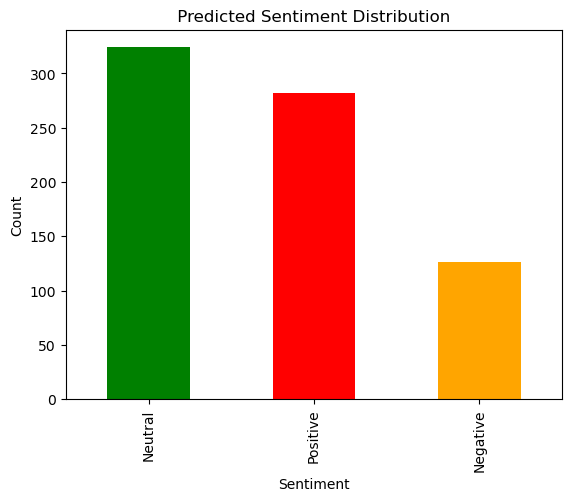

In [58]:
a['Predicted_sentiment'].value_counts().plot(kind='bar', color=['green','red','orange'])
plt.title(' Predicted Sentiment Distribution ')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

### 6. Word Cloud

In [61]:
all_words = ' '.join(a['Processed_text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_words)


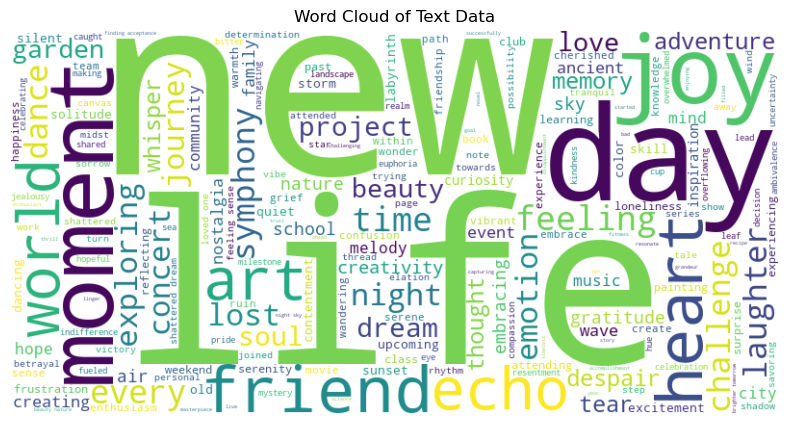

In [65]:
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Text Data')
plt.show()

### 7. Word Frequency

In [70]:
all_tokens = all_words.split()
word_freq = Counter(all_tokens)

print("Most Common Words : ")
print(word_freq.most_common(10))

Most Common Words : 
[('new', 43), ('life', 38), ('day', 29), ('joy', 28), ('dream', 28), ('feeling', 27), ('moment', 27), ('like', 27), ('friend', 26), ('heart', 26)]


#### Interpretation
    The sentiment distribution shows the counts of positive, negative and neutral comments.
    The word cloud highlights the most frequent and popular words in the text data.
    The word frequency count lists the top recurring words in the dataset.
    Together, they reveal the overall sentiment trend and common discussion topics.